In [1]:
import torch 
import numpy as np
import pandas as pd

In [2]:
inputs1 = torch.tensor(
    [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]],
    dtype=torch.float32
)

weights1 = torch.tensor(
    [[0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]],
    dtype=torch.float32
)

biases1 = torch.tensor(
    [2.0,3.0,0.5],
    dtype=torch.float32
)

In [3]:
def layer(inputs:list, weights:list, biases:list) -> list:
    """Pure python NN Layer

    Args:
        inputs (list): inputs from previous layer
        weights (list): weights of each neuron in layer
        biases (list): biases of each neuron in layer

    Returns:
        list: output of each neuron in layer 
    """
    layer_outputs = []
    for neuron_input in inputs:
        neuron_output = []
        for neuron_weights, neuron_bias in zip(weights, biases):
            output_vals = 0
            for n_input, weight in zip(neuron_input, neuron_weights):
                output_vals += n_input*weight
            output_vals += neuron_bias
            neuron_output.append(output_vals)
        layer_outputs.append(neuron_output)
    return layer_outputs

layer(inputs1.tolist(), weights1.tolist(), biases1.tolist())

[[4.80000002682209, 1.209999918937683, 2.385000005364418],
 [8.90000006556511, -1.8100001215934753, 0.19999997317790985],
 [1.410000077784062, 1.0509998478889457, 0.025999927461146655]]

In [4]:
def layer_vec(inputs:torch.tensor, weights:torch.tensor, biases:torch.tensor):
    """
        PyTorch vectorized NN Layer

    Args:
        inputs (torch.tensor): inputs from previous layer
        weights (torch.tensor): weights of each neuron in layer
        biases (torch.tensor): biases of each neuron in layer

    Returns:
        torch.tensor: output of each neuron in layer 
    """
    cummulative = torch.matmul(inputs, weights.T) + biases
    return cummulative

In [5]:
output1 = layer_vec(inputs1, weights1, biases1)

# Multi layer implementation 

In [6]:
X = torch.tensor(
    [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]],
    dtype=torch.float32
)

class Layer_Dense:
    """ 
        PyTorch Vectorized Dense Layer 
    """
    def __init__(self, n_inputs:int, n_neurons:int):
        self.weights = torch.randn(n_inputs, n_neurons)
        self.biases = torch.zeros((1, n_neurons))
    def forward(self, inputs:torch.tensor):
        self.output = torch.matmul(inputs, self.weights) + self.biases

In [7]:
L1 = Layer_Dense(4, 5)
L2 = Layer_Dense(5, 2)

In [8]:
L1.forward(X)
print(L1.output)
L2.forward(L1.output)
print(L2.output)

tensor([[ 6.4426, -3.8641,  3.7323,  2.1708,  0.7507],
        [ 9.5928,  1.7345, -3.8177, -2.4900, -1.9788],
        [-1.4131, -4.1865,  2.1101,  6.3641, -0.3431]])
tensor([[ -5.2781,  -4.2417],
        [ -4.9018, -14.8873],
        [  9.1477,   8.8205]])


In [9]:
X.shape, L1.output.shape, L2.output.shape
print(f"Input shape:{list(X.shape)} --L1[4,5]--> {list(L1.output.shape)}")
print(f"Input shape:{list(L1.output.shape)} --L2[5,2]--> {list(L2.output.shape)}")

Input shape:[3, 4] --L1[4,5]--> [3, 5]
Input shape:[3, 5] --L2[5,2]--> [3, 2]


# Adding activation functions

In [10]:
class Activation:
    """
        PyTorch Vectorized Activation functions class
    """
    def __init__(self, name:str):
        if not hasattr(self, name):
            raise ValueError(f"Activation {name} is not defined.")
        self.activation = getattr(self, name)
    def ReLU(self, X:torch.tensor) -> torch.tensor:
        return torch.maximum(torch.zeros_like(X), X)

    def sigmoid(self, X:torch.tensor) -> torch.tensor:
        return 1/(1-torch.exp(-1*X))

    def LeakyReLU(self, X:torch.tensor) -> torch.tensor:
        return torch.maximum(0.01*X, X)
    
    def Linear(self, X:torch.tensor) -> torch.tensor:
        return X
    
    def Softmax(self, X:torch.tensor) -> torch.tensor:
         exp_vals = torch.exp(X - torch.max(X, dim=1, keepdims=True))
         return exp_vals / torch.sum(exp_vals, dim=1, keepdims=True)

In [11]:
from typing import Optional

class Linear:
    def forward(self, X:torch.tensor) -> torch.tensor:
        return X

class Sigmoid:
     def forward(self, X:torch.tensor) -> torch.tensor:
        self.output = 1/(1-torch.exp(-1*X))

class ReLU:
    def forward(self, X:torch.tensor):
        self.output = torch.maximum(torch.zeros_like(X), X)
        
class LeakyReLU:
    def forward(self, X:torch.tensor) -> torch.tensor:
        return torch.maximum(0.01*X, X)

class Softmax:
    __constants__ = ['dim']
    dim: Optional[int]

    def __init__(self, dim:int):
        self.dim = dim
    
    def forward(self, X: torch.tensor) -> torch.tensor:
        exp_vals = torch.exp(X - torch.max(X, dim=self.dim, keepdims=True))
        return exp_vals / torch.sum(exp_vals, dim=self.dim, keepdims=True)

In [12]:
class Layer_Dense_act:
    """ 
        PyTorch Vectorized Dense Layer with activation functions
    """
    def __init__(self, n_inputs:int, n_neurons:int, activation_name:str):
        self.weights = torch.randn(n_inputs, n_neurons) 
        self.biases = torch.zeros((1, n_neurons))
        self.activation = Activation(activation_name).activation
    def forward(self, inputs:torch.tensor):
        self.output = self.activation(
            torch.matmul(inputs, self.weights) + self.biases
            )

<function matplotlib.pyplot.show(close=None, block=None)>

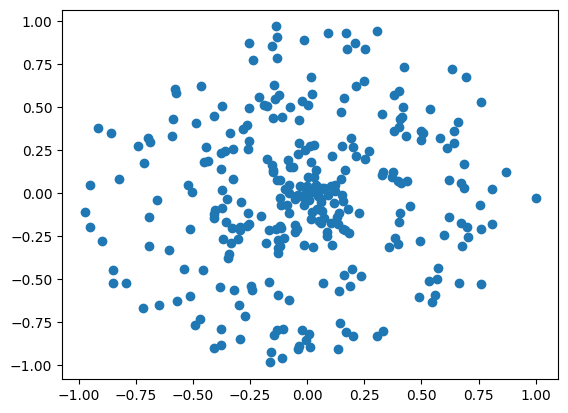

In [13]:
!pip install -qU nnfs
from nnfs.datasets import spiral_data

from matplotlib import pyplot as plt
torch.random.seed()
X,y = spiral_data(100,3)
X,y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.scatter(X[:,0], X[:,1])
plt.show

In [14]:
class Activation_ReLU:
    def forward(self, inputs:torch.tensor):
        print(type(inputs))
        self.output = torch.maximum(torch.zeros_like(inputs), inputs)

In [15]:
L1 = Layer_Dense(2, 5)
activation1 = Activation_ReLU()
L1.forward(X)
activation1.forward(L1.output)
print(L1.output)
print(activation1.output)

<class 'torch.Tensor'>
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 4.9464e-03,  1.3901e-03,  1.7662e-02,  1.1031e-02,  3.6635e-04],
        [ 9.8104e-03,  3.7589e-03,  3.4410e-02,  2.2141e-02,  1.1853e-03],
        ...,
        [ 7.2081e-02, -7.6895e-01,  7.4565e-01, -4.6408e-02, -3.5602e-01],
        [ 2.9825e-01, -5.9483e-01,  1.4848e+00,  4.8700e-01, -2.8865e-01],
        [-1.4058e-01, -7.8414e-01, -4.1269e-02, -5.0896e-01, -3.5136e-01]])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.9464e-03, 1.3901e-03, 1.7662e-02, 1.1031e-02, 3.6635e-04],
        [9.8104e-03, 3.7589e-03, 3.4410e-02, 2.2141e-02, 1.1853e-03],
        ...,
        [7.2081e-02, 0.0000e+00, 7.4565e-01, 0.0000e+00, 0.0000e+00],
        [2.9825e-01, 0.0000e+00, 1.4848e+00, 4.8700e-01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [16]:
L0 = Layer_Dense_act(2, 5, 'Linear')
L0.forward(X)
print(L0.output)
L1 = Layer_Dense_act(2, 5, 'ReLU')
L1.forward(X)
print(L1.output)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.3565e-02, -1.9179e-02,  5.4510e-03, -3.6587e-03,  1.7332e-03],
        [-2.5811e-02, -3.6944e-02,  8.5550e-03, -9.3474e-03,  4.2756e-03],
        ...,
        [-1.0592e+00, -1.1426e+00,  1.8570e+00,  1.5939e+00, -6.3490e-01],
        [-1.5587e+00, -1.8987e+00,  1.8572e+00,  1.1959e+00, -4.6317e-01],
        [-4.2728e-01, -2.6927e-01,  1.5222e+00,  1.6582e+00, -6.7212e-01]])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0123, 0.0000, 0.0000, 0.0030, 0.0264],
        [0.0244, 0.0000, 0.0000, 0.0062, 0.0508],
        ...,
        [0.1365, 0.0000, 0.0000, 0.0000, 1.5854],
        [0.7032, 0.0000, 0.0000, 0.0698, 2.6236],
        [0.0000, 0.0000, 0.1500, 0.0000, 0.3833]])


### Note: The values for both functions are different due to the random initilalization of weights
I have validated this by initializing weights with 1 and noting that the values were the same
going hence forth my way of implementing activation functions will be used